In [34]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.datasets import load_iris
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.svm import LinearSVC
from sklearn.datasets import make_moons
from sklearn.preprocessing import PolynomialFeatures
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC

In [2]:
iris = load_iris(as_frame=True)
X= iris.data
y=iris.target

In [3]:
X

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2
...,...,...,...,...
145,6.7,3.0,5.2,2.3
146,6.3,2.5,5.0,1.9
147,6.5,3.0,5.2,2.0
148,6.2,3.4,5.4,2.3


In [4]:
svc_clf = make_pipeline(StandardScaler(), LinearSVC(C=100, random_state=42))

In [5]:
svc_clf.fit(X,y)

Pipeline(steps=[('standardscaler', StandardScaler()),
                ('linearsvc', LinearSVC(C=100, random_state=42))])

In [10]:
X_test = [[6.7,3.0,5.2,2.3],[5.3, 3.7, 1.4, 1.1]]

In [11]:
svc_clf.predict(X_test)

C:\Users\Ganesh P\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


array([2, 0])

## Similarly lets implement non linear SVM 

In [25]:
X, y = make_moons(n_samples=200, noise=0.2, random_state=42)

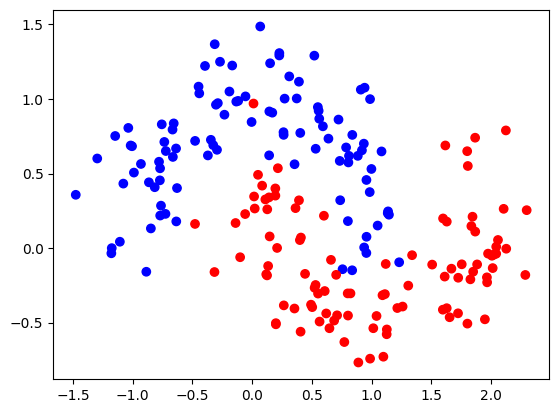

In [26]:
plt.scatter(X[:,0], X[:,1],c=y, cmap="bwr")

In [30]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [32]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [70]:
model = SVC(kernel="rbf", C=100, gamma='scale')
model.fit(X_train_scaled, y_train)

SVC(C=100)

In [71]:
x_min , x_max = X_train_scaled[:,0].min() -1 , X_train_scaled[:,0].max() + 1
y_min , y_max = X_train_scaled[:,1].min() -1 , X_train_scaled[:,1].max() + 1

In [72]:
xx , yy = np.meshgrid(np.linspace(x_min, x_max, 500), np.linspace(y_min, y_max, 500))

In [73]:
yy

array([[-2.94335927, -2.94335927, -2.94335927, ..., -2.94335927,
        -2.94335927, -2.94335927],
       [-2.93119021, -2.93119021, -2.93119021, ..., -2.93119021,
        -2.93119021, -2.93119021],
       [-2.91902115, -2.91902115, -2.91902115, ..., -2.91902115,
        -2.91902115, -2.91902115],
       ...,
       [ 3.10466136,  3.10466136,  3.10466136, ...,  3.10466136,
         3.10466136,  3.10466136],
       [ 3.11683041,  3.11683041,  3.11683041, ...,  3.11683041,
         3.11683041,  3.11683041],
       [ 3.12899947,  3.12899947,  3.12899947, ...,  3.12899947,
         3.12899947,  3.12899947]], shape=(500, 500))

In [74]:
Z = model.predict(np.c_[xx.ravel(),yy.ravel()])

In [75]:
Z = Z.reshape(xx.shape)

In [76]:
Z

array([[1, 1, 1, ..., 1, 1, 1],
       [1, 1, 1, ..., 1, 1, 1],
       [1, 1, 1, ..., 1, 1, 1],
       ...,
       [1, 1, 1, ..., 1, 1, 1],
       [1, 1, 1, ..., 1, 1, 1],
       [1, 1, 1, ..., 1, 1, 1]], shape=(500, 500))

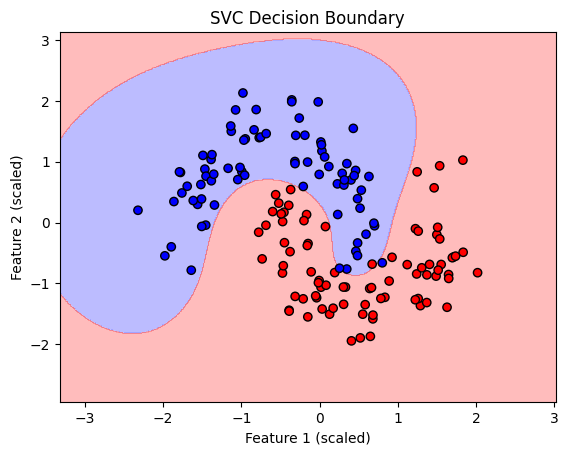

In [77]:
plt.contourf(xx, yy, Z, alpha=0.3, cmap='bwr')  # background color by class
plt.scatter(X_train_scaled[:,0], X_train_scaled[:,1], c=y_train, edgecolors='k', cmap='bwr')
plt.title("SVC Decision Boundary")
plt.xlabel("Feature 1 (scaled)")
plt.ylabel("Feature 2 (scaled)")
plt.show()
